# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


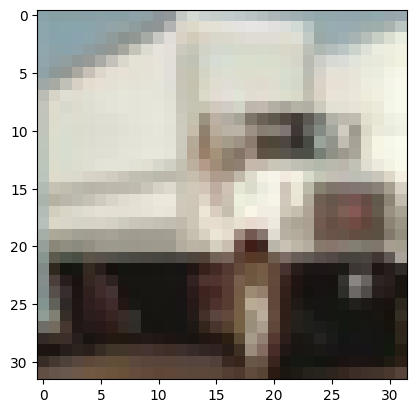

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 44s 27ms/step - loss: 1.6943 - accuracy: 0.3818 - val_loss: 1.4342 - val_accuracy: 0.4874
Epoch 2/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4454 - accuracy: 0.4830 - val_loss: 1.2852 - val_accuracy: 0.5356
Epoch 3/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3690 - accuracy: 0.5130 - val_loss: 1.2471 - val_accuracy: 0.5550
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3179 - accuracy: 0.5345 - val_loss: 1.2104 - val_accuracy: 0.5754
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2890 - accuracy: 0.5462 - val_loss: 1.4063 - val_accuracy: 0.5198
Epoch 6/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2731 - accuracy: 0.5577 - val_loss: 1.2509 - val_accuracy: 0.5653
Epoch 7/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2636 - accuracy: 0.5627 - val_loss: 1.1693 -

In [10]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2069872617721558
Test accuracy: 0.5947999954223633


#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [12]:
#New model
model_2 = Sequential()

# First conv
model_2.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# Second conv
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# First MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Third conv
model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# Fourth conv
model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# Second MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model_2.add(Flatten())

# Dense
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))

# Final layer
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))


In [14]:
#Write the number of parameters of your model and compare it to the previous model
model_1.summary()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

<b>Since there are more layers, the parameters in model 2 exceed model 1.</b>

In [15]:
#Train for 5 epochs and compare the training time, loss and accuracy numbers
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 829s 530ms/step - loss: 1.5018 - accuracy: 0.4626 - val_loss: 1.0919 - val_accuracy: 0.6114
Epoch 2/5
1563/1563 [==============================] - 830s 531ms/step - loss: 0.9657 - accuracy: 0.6648 - val_loss: 0.9168 - val_accuracy: 0.6848
Epoch 3/5
1563/1563 [==============================] - 826s 528ms/step - loss: 0.7984 - accuracy: 0.7315 - val_loss: 0.8430 - val_accuracy: 0.7118
Epoch 4/5
1563/1563 [==============================] - 833s 533ms/step - loss: 0.7382 - accuracy: 0.7550 - val_loss: 0.8024 - val_accuracy: 0.7501
Epoch 5/5
1563/1563 [==============================] - 824s 527ms/step - loss: 0.7288 - accuracy: 0.7644 - val_loss: 0.7895 - val_accuracy: 0.7484


In [16]:
score1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Model 1 Test loss:', score1[0])
print('Model 1 Test accuracy:', score1[1])

score2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Model 2 Test loss:', score2[0])
print('Model 2 Test accuracy:', score2[1])

Model 1 Test loss: 1.2069872617721558
Model 1 Test accuracy: 0.5947999954223633
Model 2 Test loss: 0.789497971534729
Model 2 Test accuracy: 0.7483999729156494


<b>Since there are more parameters and convolutional layers, the second model is more accurate compared to the first one. One drawback is that since there are more layers and parameters, it takes significantly longer to train.</b>

#### Conclusion

#In this laboratory activity, we learned about CNN or Convolutional Neural Networks with the use of Keras. A CNN essentially uses layers of fileters to break down an image into smaller parts or features. We have learned about convolutional layers, pooling layers, and how they contribute to the CNN model. We also compared models in the activity that differ in layers, strides, and different parameters, to see which is more accurate. All in all, CNN is a more complex neural network and can provide a better output/prediction compared to a simpler one.